# IPL 1st Inning Score Prediction using Machine Learning
The Dataset contains ball by ball information of the matches played between IPL Teams of **Season 1 to 10**, i.e. from 2008 to 2017.<br/>


# Import Necessary Libraries


In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
np.__version__

'1.26.4'

In [ ]:
# Mounting GDrive and importing dataset
data = pd.read_csv('/content/ipl_data1.csv')
print(f"Dataset successfully Imported of Shape : {data.shape}")

Dataset successfully Imported of Shape : (76014, 15)


# Exploratory Data Analysis

In [ ]:
# First 5 Columns Data
data.head()

,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [ ]:
# Describing Numerical Values of the Dataset
data.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [ ]:
# Information (not-null count and data type) About Each Column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   batting_team    76014 non-null  object 
 4   bowling_team    76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [ ]:
# Number of Unique Values in each column
data.nunique()

,0
mid,617
date,442
venue,35
batting_team,14
bowling_team,14
batsman,411
bowler,329
runs,252
wickets,11
overs,140


In [ ]:
# Datatypes of all Columns
data.dtypes

,0
mid,int64
date,object
venue,object
batting_team,object
bowling_team,object
batsman,object
bowler,object
runs,int64
wickets,int64
overs,float64


# Data Cleaning

#### Removing Irrelevant Data colunms

In [ ]:
# Names of all columns
data.columns

Index(['mid', 'date', 'venue', 'batting_team', 'bowling_team', 'batsman',
       'bowler', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'striker', 'non-striker', 'total'],
      dtype='object')

Here, we can see that columns _['mid', 'date', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']_ won't provide any relevant information for our model to train

In [ ]:
irrelevant = ['mid', 'date', 'venue','batsman', 'bowler', 'striker', 'non-striker']
print(f'Before Removing Irrelevant Columns : {data.shape}')
data = data.drop(irrelevant, axis=1) # Drop Irrelevant Columns
print(f'After Removing Irrelevant Columns : {data.shape}')
data.head()

Before Removing Irrelevant Columns : (76014, 15)
After Removing Irrelevant Columns : (76014, 8)


,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


#### Keeping only Consistent Teams
(teams that never change even in current season)

In [ ]:
# Define Consistent Teams
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
              'Delhi Daredevils', 'Sunrisers Hyderabad']

In [ ]:
print(f'Before Removing Inconsistent Teams : {data.shape}')
data = data[(data['batting_team'].isin(const_teams)) & (data['bowling_team'].isin(const_teams))]
print(f'After Removing Irrelevant Columns : {data.shape}')
print(f"Consistent Teams : \n{data['batting_team'].unique()}")
data.head()

Before Removing Inconsistent Teams : (76014, 8)
After Removing Irrelevant Columns : (53811, 8)
Consistent Teams : 
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']


,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


#### Remove First 5 Overs of every match

In [ ]:
print(f'Before Removing Overs : {data.shape}')
data = data[data['overs'] >= 5.0]
print(f'After Removing Overs : {data.shape}')
data.head()

Before Removing Overs : (53811, 8)
After Removing Overs : (40108, 8)


,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


Plotting a Correlation Matrix of current data

<Axes: >

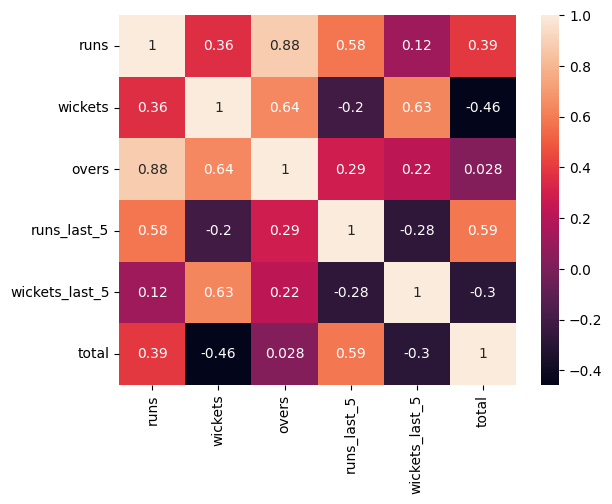

In [ ]:
from seaborn import heatmap

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
heatmap(data=correlation_matrix, annot=True)


# Data Preprocessing and Encoding

#### Performing Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for col in ['batting_team', 'bowling_team']:
  data[col] = le.fit_transform(data[col])
data.head()

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,3,6,61,0,5.1,59,0,222
33,3,6,61,1,5.2,59,1,222
34,3,6,61,1,5.3,59,1,222
35,3,6,61,1,5.4,59,1,222
36,3,6,61,1,5.5,58,1,222


#### Performing One Hot Encoding and Column Transformation

In [ ]:
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder',
                                        OneHotEncoder(),
                                        [0, 1])],
                                      remainder='passthrough')

In [ ]:
data = np.array(columnTransformer.fit_transform(data))

Save the Numpy Array in a new DataFrame with transformed columns

In [ ]:
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total']
df = pd.DataFrame(data, columns=cols)

In [ ]:
# Visualize Encoded Data
df.head()

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,...,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,0.0,5.1,59.0,0.0,222.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.2,59.0,1.0,222.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.3,59.0,1.0,222.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.4,59.0,1.0,222.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.5,58.0,1.0,222.0


# Model Building

## Prepare Train and Test Splits

In [ ]:
features = df.drop(['total'], axis=1)
labels = df['total']

In [ ]:
# Perform 80 : 20 Train-Test split
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (32086, 21)
Testing Set : (8022, 21)


## Model Algorithms
Training and Testing on different Machine Learning Algorithms for the best algorithm to choose from

In [ ]:
# Keeping track of model perfomances
models = dict()

#### Neural Networks

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

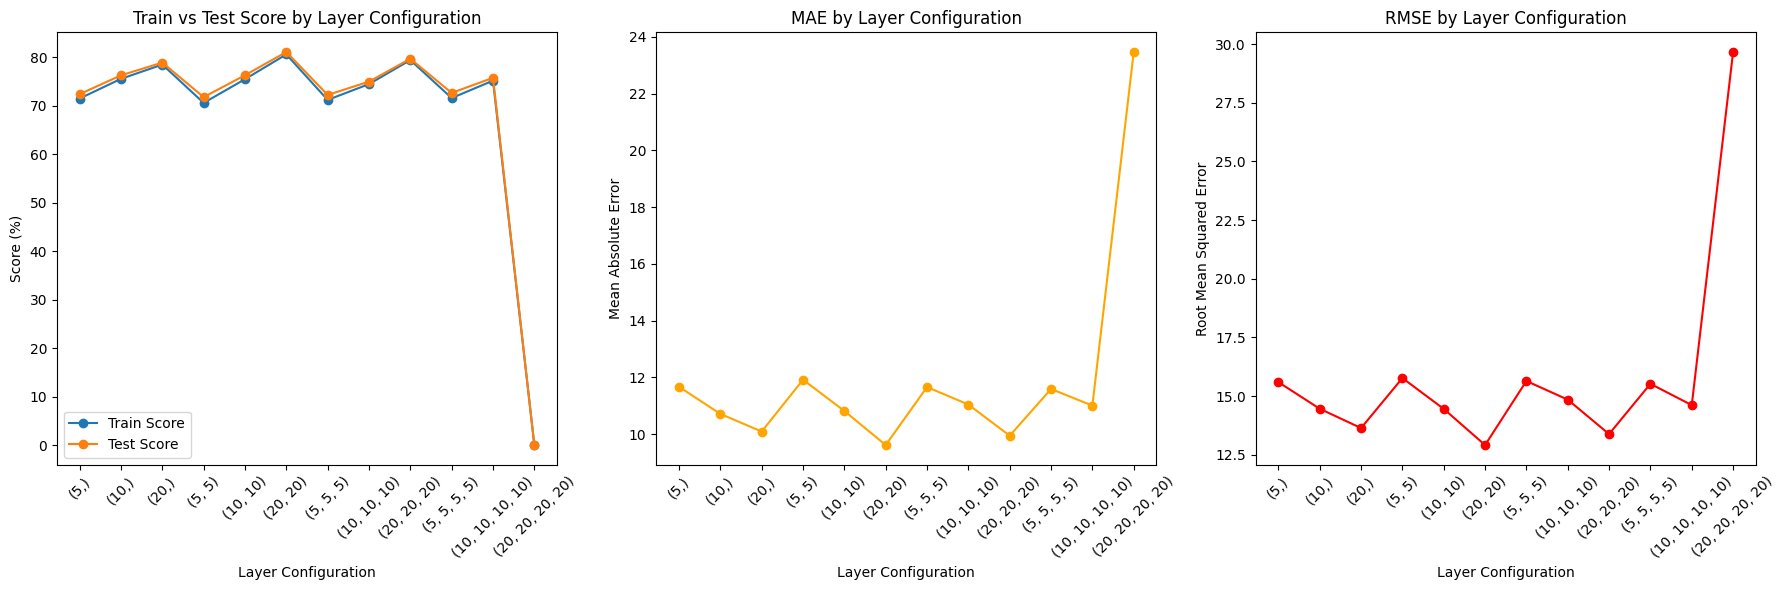

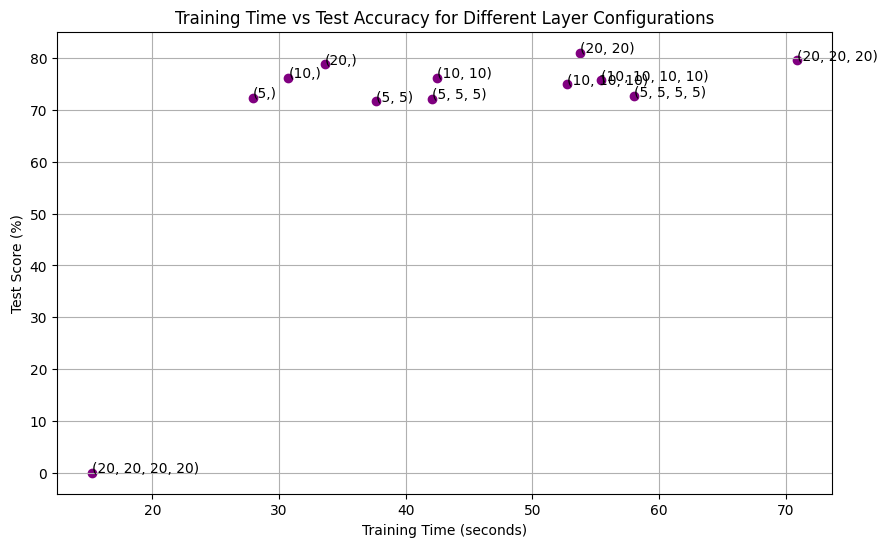

Configuration: (5,)
Train Score: 71.44%
Test Score: 72.34%
Training Time: 27.9131 seconds
MAE: 11.6679
MSE: 243.3271
RMSE: 15.5989

Configuration: (10,)
Train Score: 75.50%
Test Score: 76.22%
Training Time: 30.7338 seconds
MAE: 10.7141
MSE: 209.2013
RMSE: 14.4638

Configuration: (20,)
Train Score: 78.44%
Test Score: 78.85%
Training Time: 33.6121 seconds
MAE: 10.0919
MSE: 186.0858
RMSE: 13.6413

Configuration: (5, 5)
Train Score: 70.54%
Test Score: 71.73%
Training Time: 37.6646 seconds
MAE: 11.9176
MSE: 248.7605
RMSE: 15.7721

Configuration: (10, 10)
Train Score: 75.43%
Test Score: 76.24%
Training Time: 42.4823 seconds
MAE: 10.8181
MSE: 209.0404
RMSE: 14.4582

Configuration: (20, 20)
Train Score: 80.54%
Test Score: 81.04%
Training Time: 53.7395 seconds
MAE: 9.6156
MSE: 166.8602
RMSE: 12.9174

Configuration: (5, 5, 5)
Train Score: 71.16%
Test Score: 72.18%
Training Time: 42.0466 seconds
MAE: 11.6596
MSE: 244.8009
RMSE: 15.6461

Configuration: (10, 10, 10)
Train Score: 74.42%
Test Score: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
import time

# Define layer configurations with up to 4 hidden layers
layer_configs = [
    (5,), (10,), (20,),                   # 1 hidden layer
    (5, 5), (10, 10), (20, 20),           # 2 hidden layers
    (5, 5, 5), (10, 10, 10), (20, 20, 20),  # 3 hidden layers
    (5, 5, 5, 5), (10, 10, 10, 10), (20, 20, 20, 20)  # 4 hidden layers
]

# Lists to store performance metrics and training times for each configuration
train_scores = []
test_scores = []
train_times = []
mae_scores = []
mse_scores = []
rmse_scores = []

for layers in layer_configs:
    # Initialize the model with the current layer configuration
    neural_net = MLPRegressor(hidden_layer_sizes=layers, activation='logistic', max_iter=500, random_state=1)

    # Record the start time
    start_time = time.time()

    # Train the model
    neural_net.fit(train_features, train_labels)

    # Record the end time and calculate training time
    end_time = time.time()
    training_time = end_time - start_time
    train_times.append(training_time)

    # Calculate and store scores
    train_score = neural_net.score(train_features, train_labels) * 100
    test_score = neural_net.score(test_features, test_labels) * 100
    test_predictions = neural_net.predict(test_features)

    # Calculate error metrics
    test_mae = mae(test_labels, test_predictions)
    test_mse = mse(test_labels, test_predictions)
    test_rmse = np.sqrt(test_mse)

    # Append scores and metrics to lists
    train_scores.append(train_score)
    test_scores.append(test_score)
    mae_scores.append(test_mae)
    mse_scores.append(test_mse)
    rmse_scores.append(test_rmse)

# Plot the performance metrics for each layer configuration
plt.figure(figsize=(18, 6))

# Train and Test Scores
plt.subplot(1, 3, 1)
plt.plot([str(l) for l in layer_configs], train_scores, label='Train Score', marker='o')
plt.plot([str(l) for l in layer_configs], test_scores, label='Test Score', marker='o')
plt.xlabel('Layer Configuration')
plt.ylabel('Score (%)')
plt.title('Train vs Test Score by Layer Configuration')
plt.xticks(rotation=45)
plt.legend()

# MAE
plt.subplot(1, 3, 2)
plt.plot([str(l) for l in layer_configs], mae_scores, label='MAE', color='orange', marker='o')
plt.xlabel('Layer Configuration')
plt.ylabel('Mean Absolute Error')
plt.title('MAE by Layer Configuration')
plt.xticks(rotation=45)

# RMSE
plt.subplot(1, 3, 3)
plt.plot([str(l) for l in layer_configs], rmse_scores, label='RMSE', color='red', marker='o')
plt.xlabel('Layer Configuration')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE by Layer Configuration')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Plot Training Time vs Accuracy (Test Score)
plt.figure(figsize=(10, 6))
plt.scatter(train_times, test_scores, color='purple', marker='o')
for i, txt in enumerate([str(l) for l in layer_configs]):
    plt.annotate(txt, (train_times[i], test_scores[i]))
plt.xlabel('Training Time (seconds)')
plt.ylabel('Test Score (%)')
plt.title('Training Time vs Test Accuracy for Different Layer Configurations')
plt.grid(True)
plt.show()

# Display the results in text
for idx, layers in enumerate(layer_configs):
    print(f'Configuration: {layers}')
    print(f'Train Score: {train_scores[idx]:.2f}%')
    print(f'Test Score: {test_scores[idx]:.2f}%')
    print(f'Training Time: {train_times[idx]:.4f} seconds')
    print(f'MAE: {mae_scores[idx]:.4f}')
    print(f'MSE: {mse_scores[idx]:.4f}')
    print(f'RMSE: {rmse_scores[idx]:.4f}\n')

# Store the final model with the best test score
best_index = test_scores.index(max(test_scores))
models["neural_net"] = test_scores[best_index]


# Predictions

In [ ]:
# Ensure you have imported necessary libraries
import numpy as np

# Define or load your model here (this is an example; ensure 'forest' is a trained model)
# Example: forest = RandomForestRegressor().fit(X_train, y_train)

# Define the prediction function
def predict_score(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=neural_net):
    prediction_array = []

    # Batting Team Encoding
    if batting_team == 'Chennai Super Kings':
        prediction_array += [1,0,0,0,0,0,0,0]
    elif batting_team == 'Delhi Daredevils':
        prediction_array += [0,1,0,0,0,0,0,0]
    elif batting_team == 'Kings XI Punjab':
        prediction_array += [0,0,1,0,0,0,0,0]
    elif batting_team == 'Kolkata Knight Riders':
        prediction_array += [0,0,0,1,0,0,0,0]
    elif batting_team == 'Mumbai Indians':
        prediction_array += [0,0,0,0,1,0,0,0]
    elif batting_team == 'Rajasthan Royals':
        prediction_array += [0,0,0,0,0,1,0,0]
    elif batting_team == 'Royal Challengers Bangalore':
        prediction_array += [0,0,0,0,0,0,1,0]
    elif batting_team == 'Sunrisers Hyderabad':
        prediction_array += [0,0,0,0,0,0,0,1]

    # Bowling Team Encoding
    if bowling_team == 'Chennai Super Kings':
        prediction_array += [1,0,0,0,0,0,0,0]
    elif bowling_team == 'Delhi Daredevils':
        prediction_array += [0,1,0,0,0,0,0,0]
    elif bowling_team == 'Kings XI Punjab':
        prediction_array += [0,0,1,0,0,0,0,0]
    elif bowling_team == 'Kolkata Knight Riders':
        prediction_array += [0,0,0,1,0,0,0,0]
    elif bowling_team == 'Mumbai Indians':
        prediction_array += [0,0,0,0,1,0,0,0]
    elif bowling_team == 'Rajasthan Royals':
        prediction_array += [0,0,0,0,0,1,0,0]
    elif bowling_team == 'Royal Challengers Bangalore':
        prediction_array += [0,0,0,0,0,0,1,0]
    elif bowling_team == 'Sunrisers Hyderabad':
        prediction_array += [0,0,0,0,0,0,0,1]

    # Add other match features
    prediction_array += [runs, wickets, overs, runs_last_5, wickets_last_5]

    # Convert to numpy array
    prediction_array = np.array([prediction_array])

    # Make prediction
    pred = model.predict(prediction_array)

    # Return rounded prediction
    return int(round(pred[0]))

# First Prediction
batting_team = 'Delhi Daredevils'
bowling_team = 'Chennai Super Kings'
overs = 10.2
runs = 68
wickets = 3
runs_last_5 = 29
wickets_last_5 = 1

score1 = predict_score(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5)
print(f'Predicted Score : {score1} || Actual Score : 147')

# Second Prediction
batting_team = 'Mumbai Indians'
bowling_team = 'Kings XI Punjab'
overs = 12.3
runs = 113
wickets = 2
runs_last_5 = 55
wickets_last_5 = 0

score2 = predict_score(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5)
print(f'Predicted Score : {score2} || Actual Score : 176')


Predicted Score : 162 || Actual Score : 147
Predicted Score : 162 || Actual Score : 176


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
